In [1]:
def add_hist(img):
    maskR = np.zeros(img.shape, dtype = np.uint8)
    maskG = np.zeros(img.shape, dtype = np.uint8)
    maskB = np.zeros(img.shape, dtype = np.uint8)
    h = cv2.calcHist([img],[0],None,[256],[0,256])
    for i, bin_ in enumerate(h):
        cv2.line(maskR,(5*i,img.shape[0]),(5*i,img.shape[0] - int(bin_* 10/img.shape[0])),(255/2, 0 , 0), 4)
        
    h = cv2.calcHist([img],[1],None,[256],[0,256])
    for i, bin_ in enumerate(h):
        cv2.line(maskG,(5*i,img.shape[0]),(5*i,img.shape[0] - int(bin_* 10/img.shape[0])),(0,255/2,0), 4)
    
    h = cv2.calcHist([img],[2],None,[256],[0,256])
    for i, bin_ in enumerate(h):
        cv2.line(maskB,(5*i,img.shape[0]),(5*i,img.shape[0] - int(bin_* 10/img.shape[0])),(0,0,255/2), 4)
        
    R = cv2.add(img, maskR)
    R = cv2.add(R, maskG)
    R = cv2.add(R, maskB)
    
    #return cv2.add(img, np.zeros(img.shape, dtype = np.uint8))
    return R

def processar(frame):
    frame = add_hist(frame)
    cv2.imshow("Frame", frame)
    return

In [ ]:
import numpy as np
import cv2
from importlib import reload
from skimage.util import random_noise

cap = cv2.VideoCapture(0)

print(cap.isOpened())

while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret==True:
        
        try:
            processar(frame)
            #cv2.imshow('Frame', processar(frame))
        except Exception as e:
            cv2.putText(frame,'DEFAULT IMAGE', (0,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (160,255,255), 2)
            cv2.putText(frame, str(e), (0,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)
            cv2.imshow('frame',frame)
        

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

True


uint8


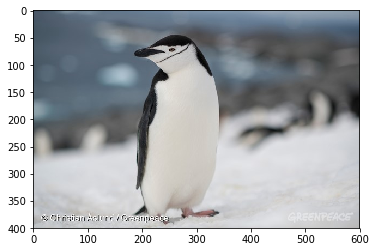

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("../Imgs/pinguim.jpg", cv2.IMREAD_COLOR)
print(img.dtype)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hR = cv2.calcHist([img],[0],None,[256],[0,256])
hB = cv2.calcHist([img],[1],None,[256],[0,256])
hG = cv2.calcHist([img],[2],None,[256],[0,256])
plt.imshow(img)
plt.show()

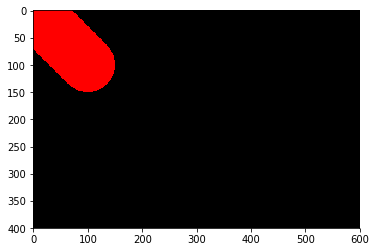

In [4]:
mask = np.zeros(img.shape, dtype = np.uint8)
cv2.line(mask, (10, 10), (100, 100), (255, 0, 0), 100)
plt.imshow(mask)

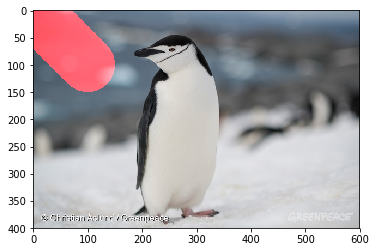

In [5]:
plt.imshow(cv2.add(img, mask))

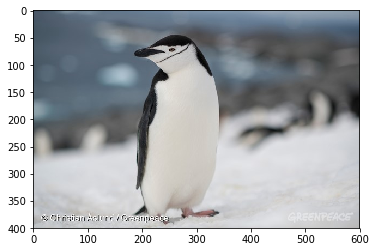

In [6]:
plt.imshow(img)